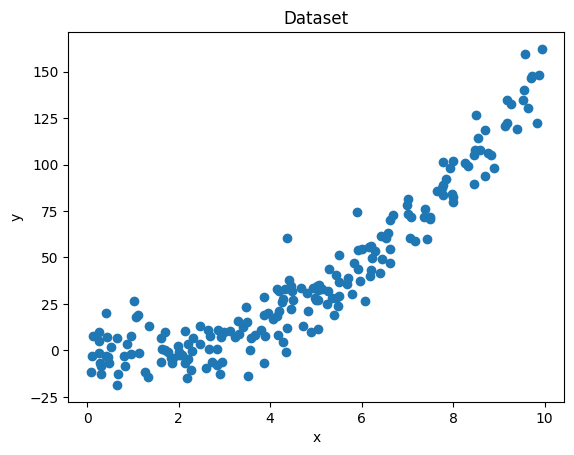

Training R^2: 0.9406545375037739
Training MSE: 109.98490213707564
Test R^2: 0.9527520181880992
Test MSE: 90.11916196493416


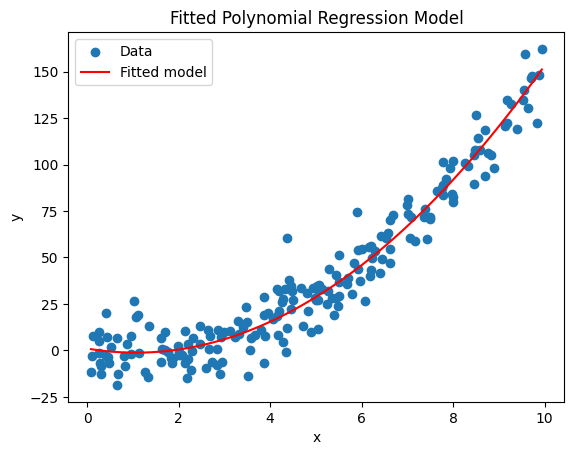

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# a) Copy the code to your own script
# Set random seed for reproducibility
np.random.seed(2)

# Generate data
x = np.random.uniform(0, 10, 200)
y = 2 * x**2 - 5 * x + 3 + np.random.normal(0, 10, 200)

# b) Split the data: Divide the dataset into a training set and a test set
x = x.reshape(-1, 1)  # Reshape the data to fit the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# c) Plot the data and look at the relationship between variables
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

# d) Train the model: Fit the model to the training data (using Polynomial Regression)
# Fit a polynomial regression model (degree 2)
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

# e) Evaluate the trained model by R^2 and MSE on training data
y_train_pred = model.predict(x_train_poly)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f'Training R^2: {train_r2}')
print(f'Training MSE: {train_mse}')

# f) Evaluate the model on test data by R^2 and MSE
y_test_pred = model.predict(x_test_poly)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Test R^2: {test_r2}')
print(f'Test MSE: {test_mse}')

# g) Refine and iterate: If the model's performance is not satisfactory, iterate and refine
# (optional) Plot the fitted model
plt.scatter(x, y, label='Data')
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(poly.transform(x_range))
plt.plot(x_range, y_range_pred, color='red', label='Fitted model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomial Regression Model')
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

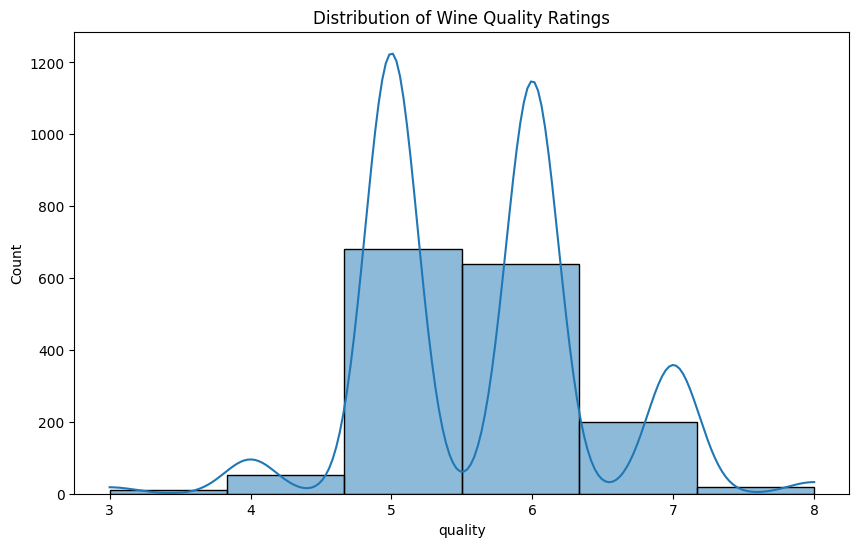

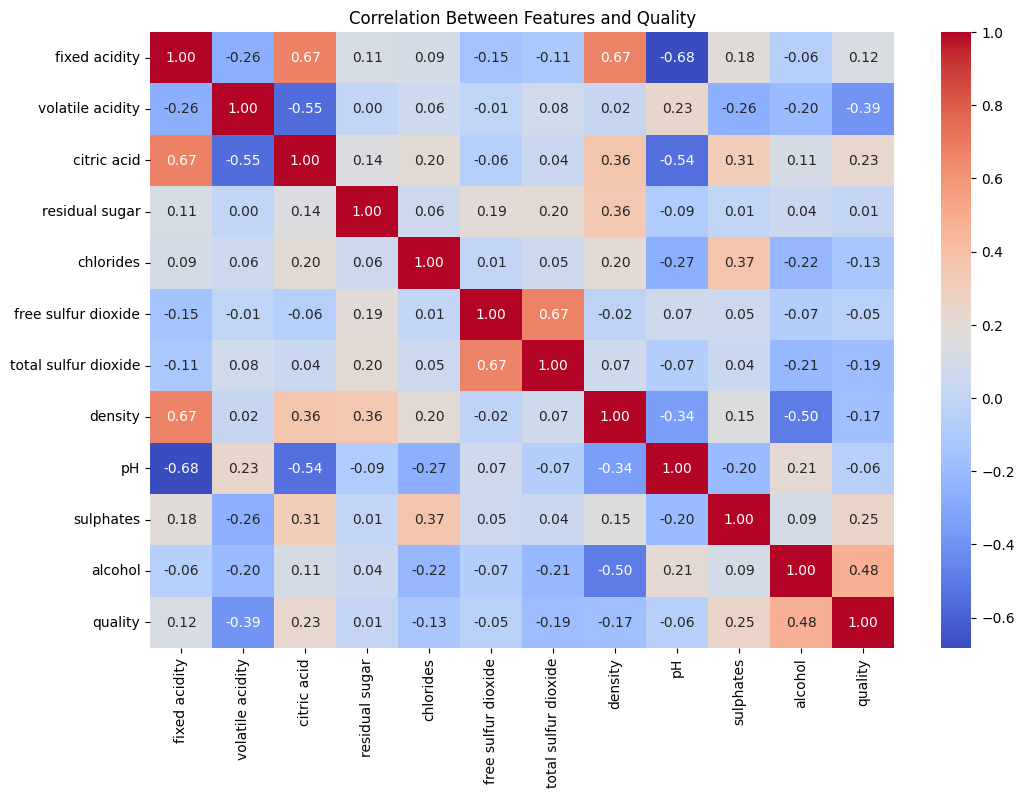

Linear Regression Model - Training R^2: 0.3479926193529862, Training MSE: 0.4241911573139901
Linear Regression Model - Test R^2: 0.4031803412796233, Test MSE: 0.390025143963954
Random Forest Model - Training R^2: 0.9265672153390224, Training MSE: 0.047774824081313526
Random Forest Model - Test R^2: 0.5390429623873638, Test MSE: 0.30123812499999997
Random Forest performs better.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# a) Load the winequality-red dataset
data = pd.read_csv('winequality-red.csv', sep=';')  # Adjust the path to the actual location of your dataset

# b) Explore the dataset (structure, column names, data types)
print(data.info())
print(data.describe())

# c) Handle any missing values or outliers (if any)
# Check for missing values
print(data.isnull().sum())

# (For simplicity, assuming no missing values in the dataset)

# d) Visualize distributions and relationships
plt.figure(figsize=(10,6))
sns.histplot(data['quality'], bins=6, kde=True)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

# Visualize relationships between attributes and quality
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features and Quality')
plt.show()

# e) Split the dataset into training and test sets
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# f) Select a model (starting with Linear Regression)
model_1 = LinearRegression()

# g) Train the chosen model
model_1.fit(X_train, y_train)

# h) Evaluate the trained model by R^2
y_train_pred_1 = model_1.predict(X_train)
y_test_pred_1 = model_1.predict(X_test)

train_r2_1 = r2_score(y_train, y_train_pred_1)
test_r2_1 = r2_score(y_test, y_test_pred_1)
train_mse_1 = mean_squared_error(y_train, y_train_pred_1)
test_mse_1 = mean_squared_error(y_test, y_test_pred_1)

print(f"Linear Regression Model - Training R^2: {train_r2_1}, Training MSE: {train_mse_1}")
print(f"Linear Regression Model - Test R^2: {test_r2_1}, Test MSE: {test_mse_1}")

# i) Choose a different model (Random Forest Regressor)
model_2 = RandomForestRegressor(random_state=42)
model_2.fit(X_train, y_train)

# Evaluate the new model
y_train_pred_2 = model_2.predict(X_train)
y_test_pred_2 = model_2.predict(X_test)

train_r2_2 = r2_score(y_train, y_train_pred_2)
test_r2_2 = r2_score(y_test, y_test_pred_2)
train_mse_2 = mean_squared_error(y_train, y_train_pred_2)
test_mse_2 = mean_squared_error(y_test, y_test_pred_2)

print(f"Random Forest Model - Training R^2: {train_r2_2}, Training MSE: {train_mse_2}")
print(f"Random Forest Model - Test R^2: {test_r2_2}, Test MSE: {test_mse_2}")

# j) Compare the performance of both models and select the best one
if test_r2_1 > test_r2_2:
    print("Linear Regression performs better.")
else:
    print("Random Forest performs better.")

# k) Discuss limitations of the models
# - Linear Regression assumes a linear relationship, which may not capture complex patterns in the data.
# - Random Forest is more flexible but can be prone to overfitting, especially with small datasets.
# - Possible improvements: tuning hyperparameters, trying other models like Gradient Boosting, SVM, or neural networks, feature engineering, and using cross-validation for better generalization.


In [12]:
import numpy as np

# Function to calculate IOU for one pair of bounding boxes
def calculate_iou(true_box, pred_box):
    # true_box and pred_box are arrays or lists in the format [xmin, ymin, xmax, ymax]
    x_min_true, y_min_true, x_max_true, y_max_true = true_box
    x_min_pred, y_min_pred, x_max_pred, y_max_pred = pred_box

    # Calculate the coordinates of the intersection box
    x_min_inter = max(x_min_true, x_min_pred)
    y_min_inter = max(y_min_true, y_min_pred)
    x_max_inter = min(x_max_true, x_max_pred)
    y_max_inter = min(y_max_true, y_max_pred)

    # Calculate the area of the intersection box
    inter_width = max(0, x_max_inter - x_min_inter)
    inter_height = max(0, y_max_inter - y_min_inter)
    intersection_area = inter_width * inter_height

    # Calculate the area of both the true and predicted boxes
    true_box_area = (x_max_true - x_min_true) * (y_max_true - y_min_true)
    pred_box_area = (x_max_pred - x_min_pred) * (y_max_pred - y_min_pred)

    # Calculate the union area
    union_area = true_box_area + pred_box_area - intersection_area

    # Compute IOU
    iou = intersection_area / union_area if union_area != 0 else 0
    return iou

# Function to calculate the mean IOU across all bounding boxes
def mean_iou(true_boxes, pred_boxes):
    # true_boxes and pred_boxes are lists or arrays of bounding boxes in the format [[xmin, ymin, xmax, ymax], ...]
    iou_values = [calculate_iou(true_box, pred_box) for true_box, pred_box in zip(true_boxes, pred_boxes)]
    
    # Calculate the mean IOU
    mean_iou_value = np.mean(iou_values)
    return mean_iou_value, iou_values

# Example usage with sample data (replace with actual predictions and true values)
true_boxes = [[50, 50, 150, 150], [30, 30, 100, 100]]  # Replace with actual true boxes
pred_boxes = [[60, 60, 140, 140], [20, 20, 110, 110]]  # Replace with actual predicted boxes

# Calculate the mean IOU
mean_iou_value, iou_list = mean_iou(true_boxes, pred_boxes)
print(f"Mean IOU: {mean_iou_value}")
print(f"Individual IOU values: {iou_list}")


Mean IOU: 0.6224691358024692
Individual IOU values: [0.64, 0.6049382716049383]


In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Assuming `iou_values` contains the IOU values for each bounding box (independent variable)
# and `category` contains the infection status (dependent variable: 1 if infected, 0 otherwise)

# Example synthetic data (replace with your actual IOU and category values)
iou_values = np.random.rand(100, 1)  # Replace with the actual IOU data
category = np.random.randint(0, 2, size=100)  # Replace with the actual category data (1 for infected, 0 for not infected)

# Fit logistic regression model
model = LogisticRegression()
model.fit(iou_values, category)

# Predicted probabilities for the full model
y_pred_prob = model.predict_proba(iou_values)

# Log-likelihood of the fitted model
log_likelihood_full = -log_loss(category, y_pred_prob, normalize=False)

# Null model: A model with only an intercept (no features)
null_model = LogisticRegression()
null_model.fit(np.ones((iou_values.shape[0], 1)), category)  # Fit model with a constant column (intercept only)
y_null_prob = null_model.predict_proba(np.ones((iou_values.shape[0], 1)))

# Log-likelihood of the null model
log_likelihood_null = -log_loss(category, y_null_prob, normalize=False)

# McFadden's R-squared
r_squared_mcfadden = 1 - (log_likelihood_full / log_likelihood_null)
print(f"McFadden's R-squared: {r_squared_mcfadden}")

#3.2b
#Generalization: The primary goal of any predictive model is to generalize well to unseen data. By testing the model on a test set 
# (data the model hasn't seen during training), we can estimate how well the model is likely to perform on new, unseen examples.

#Avoiding Overfitting: A model might perform exceptionally well on the training set but fail to generalize to new data because it has 
# memorized the training data (a phenomenon known as overfitting). By using a test set, we can check whether the model overfits the training data.

#Unbiased Estimate of Performance: The test set provides an unbiased estimate of the model's performance because it is independent of the 
# training process. Without a test set, we might be overly optimistic about the model's accuracy and reliability.

McFadden's R-squared: 0.005636483940863801
